#Importing necessary libraries

In [48]:

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # Linear Regression algorithm
from sklearn.ensemble import RandomForestRegressor  # Random Forest algorithm
from xgboost import XGBRegressor  # XGBoost algorithm
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the dataset
# Assuming the dataset is downloaded and saved as 'Life Expectancy Data.csv'

In [49]:
df = pd.read_csv('/content/led.csv')

# Display basic information about the dataset

In [50]:
print("Dataset Information:")
print(df.info())  # Shows columns, non-null counts, and data types
print("\nFirst 5 rows of the dataset:")
print(df.head())  # Displays first 5 rows to understand the data structure


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-nu

In [51]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

> # Check for missing values



In [52]:
print("\nMissing values in each column:")
print(df.isnull().sum())  # Counts null values in each column


Missing values in each column:
Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64


# Handle missing values
# We'll use median imputation for numerical columns and mode for categorical

In [58]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create imputers

In [59]:
num_imputer = SimpleImputer(strategy='median')  # Replaces missing values with median
cat_imputer = SimpleImputer(strategy='most_frequent')  # Replaces missing values with most frequent value

# Apply imputation

In [61]:
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


# Verify no missing values remain

In [62]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64


# Exploratory Data Analysis (EDA)

# Summary statistics

In [12]:
print("\nSummary statistics:")
print(df.describe())  # Shows count, mean, std, min, max, etc.


Summary statistics:
              Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2938.000000     2938.000000   2938.000000  2938.000000   
mean   2007.518720       69.234717      164.725664     30.303948     4.546875   
std       4.613841        9.509115      124.086215    117.926501     3.921946   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.200000       74.000000      0.000000     1.092500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.600000      227.000000     22.000000     7.390000   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2938.000000    2938.000000  2938.000000   
mean              738.251295    83.022124    2419.592240    38.381178   
std              1987.914858  

# Visualize the distribution of the target variable (Life expectancy)

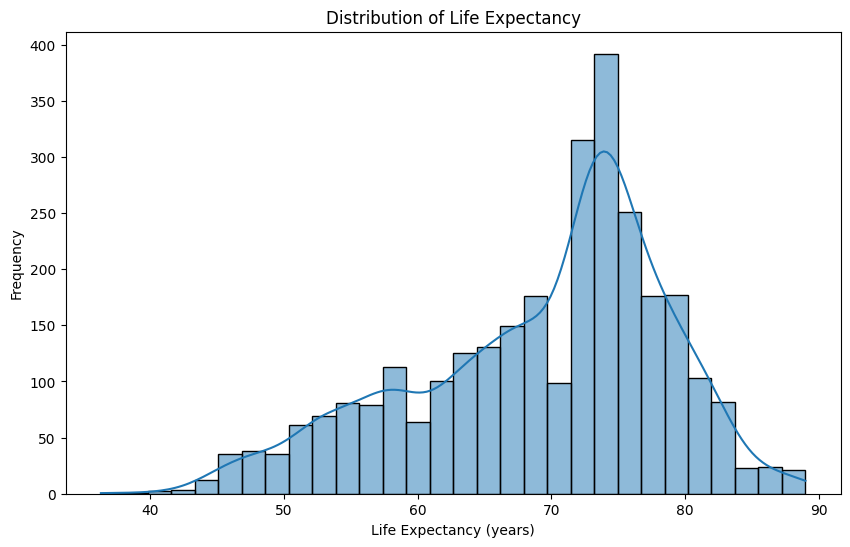

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Lifeexpectancy'],kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to understand relationships between variables

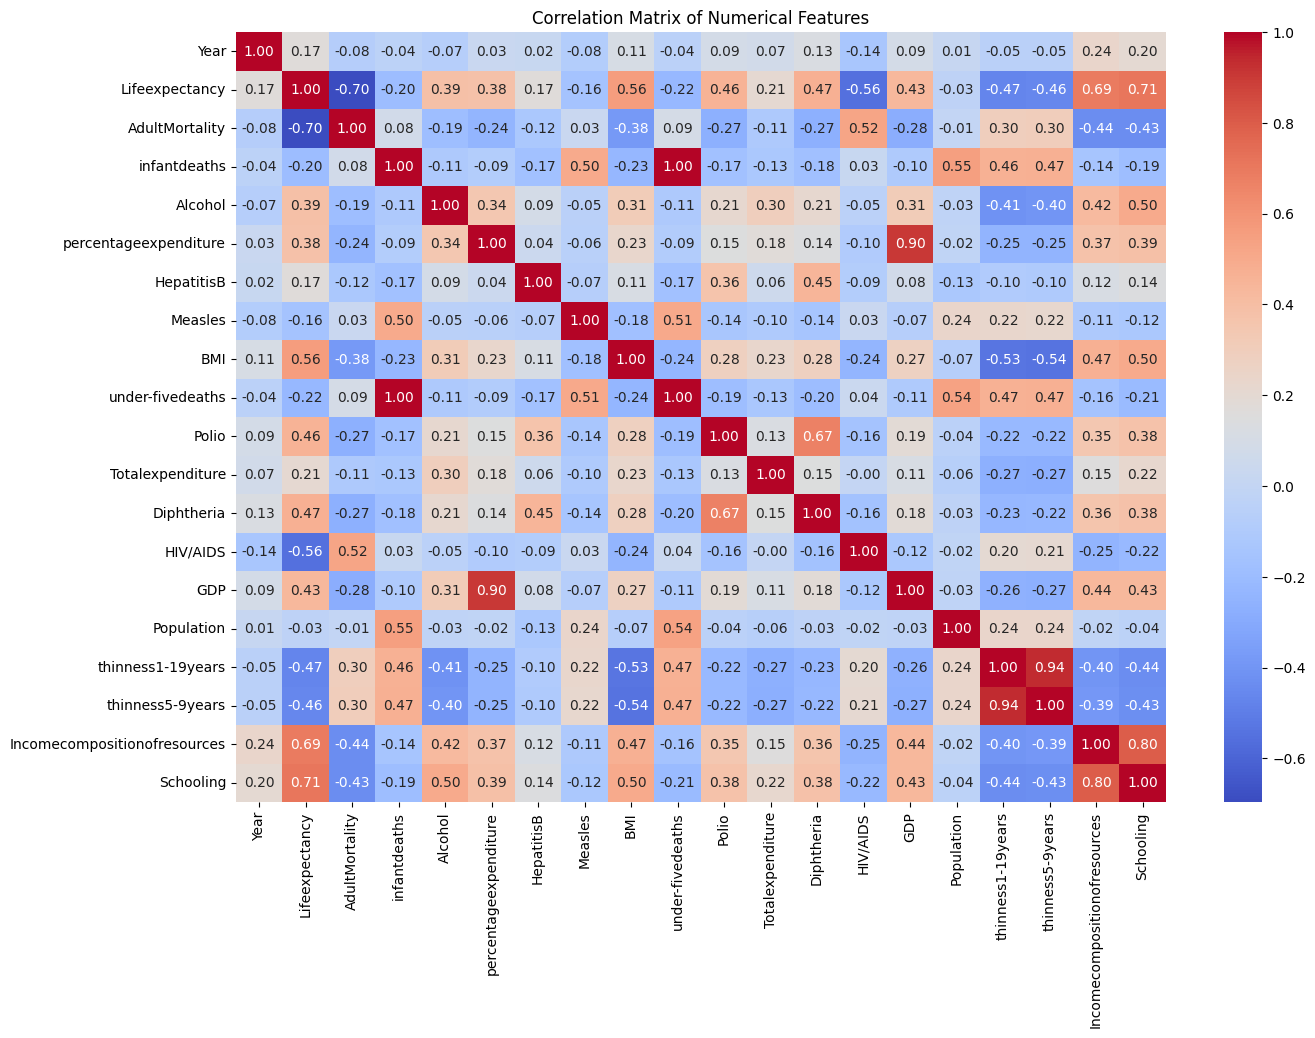

In [19]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr(numeric_only=True)  # Calculates correlation between numerical columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineering
# Encoding categorical variables (Country and Status)

In [20]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)  # Converts Status to binary (1 for Developed, 0 for Developing)

# For Country, since there are many unique values, we'll drop it to avoid high dimensionality

In [21]:
df.drop('Country', axis=1, inplace=True)  # Removes Country column

# Define features (X) and target (y)

In [23]:
X = df.drop('Lifeexpectancy', axis=1)  # All columns except Life expectancy
y = df['Lifeexpectancy']  # Target variable we want to predict

# Split the data into training and testing sets (80% train, 20% test)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# Many algorithms perform better when features are on similar scales

In [25]:
scaler = StandardScaler()  # Standardizes features by removing mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data using same scaling

# Model Building and Evaluation

# Dictionary to store evaluation results
# 1. Linear Regression

In [28]:
results = {}

# 1. Linear Regression
lr = LinearRegression()  # Creates a linear regression model
lr.fit(X_train_scaled, y_train)  # Trains the model on scaled training data
y_pred_lr = lr.predict(X_test_scaled)  # Makes predictions on test data


# Calculate evaluation metrics

In [29]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Root Mean Squared Error
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Mean Absolute Error
r2_lr = r2_score(y_test, y_pred_lr)  # R-squared score

In [30]:
# Store results
results['Linear Regression'] = {'RMSE': rmse_lr, 'MAE': mae_lr, 'R2': r2_lr}

# 2. Random Forest Regressor

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Creates RF model with 100 trees
rf.fit(X_train_scaled, y_train)  # Trains the model
y_pred_rf = rf.predict(X_test_scaled)  # Makes predictions

# Calculate metrics

In [32]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Store results

In [33]:
results['Random Forest'] = {'RMSE': rmse_rf, 'MAE': mae_rf, 'R2': r2_rf}

# 3. XGBoost Regressor

In [34]:
xgb = XGBRegressor(n_estimators=100, random_state=42)  # Creates XGBoost model with 100 trees
xgb.fit(X_train_scaled, y_train)  # Trains the model
y_pred_xgb = xgb.predict(X_test_scaled)  # Makes predictions


# Calculate metrics

In [35]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


# Store results

In [36]:
results['XGBoost'] = {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R2': r2_xgb}

# 4. Support Vector Regression

In [37]:
svr = SVR(kernel='rbf')  # Creates SVR model with Radial Basis Function kernel
svr.fit(X_train_scaled, y_train)  # Trains the model
y_pred_svr = svr.predict(X_test_scaled)  # Makes predictions

# Calculate metrics

In [38]:
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


# Store results

In [39]:
results['Support Vector Regression'] = {'RMSE': rmse_svr, 'MAE': mae_svr, 'R2': r2_svr}

# Display results

In [40]:
print("\nModel Evaluation Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"RMSE: {metrics['RMSE']:.2f}")  # Lower is better
    print(f"MAE: {metrics['MAE']:.2f}")  # Lower is better
    print(f"R2 Score: {metrics['R2']:.2f}")  # Closer to 1 is better


Model Evaluation Results:

Linear Regression:
RMSE: 3.91
MAE: 2.86
R2 Score: 0.82

Random Forest:
RMSE: 1.66
MAE: 1.08
R2 Score: 0.97

XGBoost:
RMSE: 1.75
MAE: 1.18
R2 Score: 0.96

Support Vector Regression:
RMSE: 3.32
MAE: 2.31
R2 Score: 0.87


# Feature Importance for the best performing model (Random Forest or XGBoost)
# Let's check feature importance from Random Forest

In [41]:
feature_importance = rf.feature_importances_  # Gets importance scores from trained RF model
features = X.columns  # Gets feature names

# Create a dataframe for visualization

In [42]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)  # Sorts by importance

# Plot feature importance

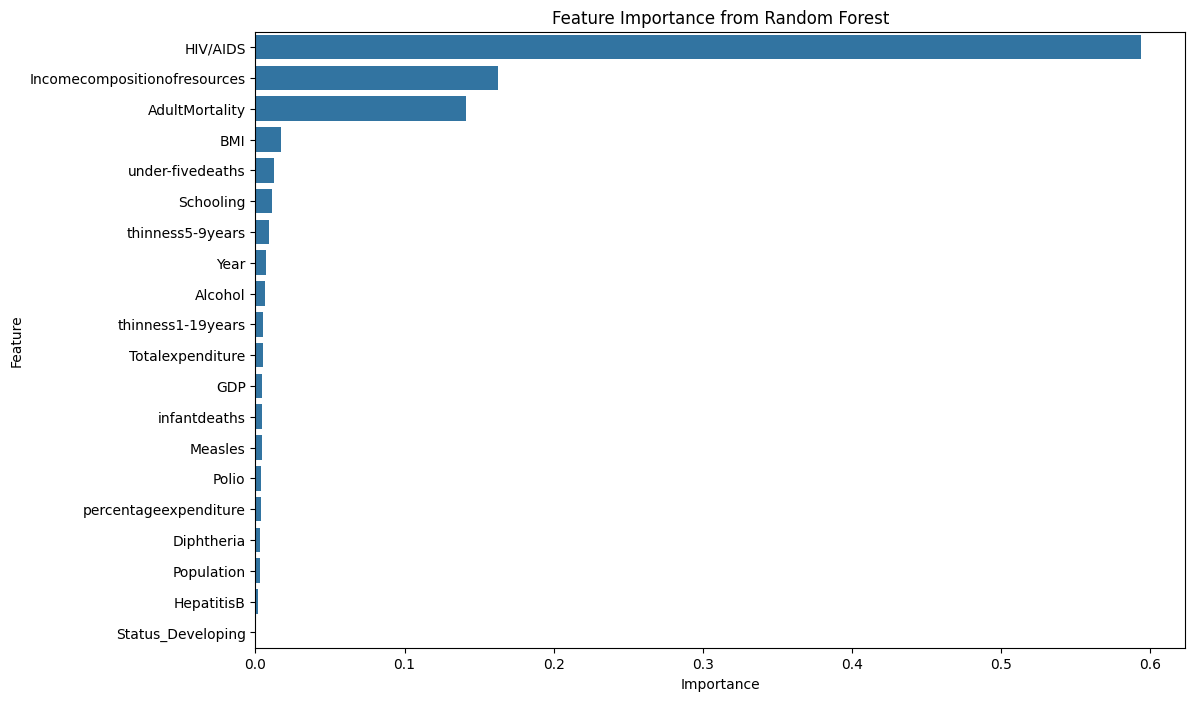

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()